# <center>L2 Computational Physics</center>

## <center>Week 3: Differential Equations I</center>

In [1]:
# usual packages to import
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

In this notebook, you will generate and plot the decay curve for Iodine-133 analytically and numerically. $^{133}\textrm{I}$ has a half life $t_{1/2}$ of 20.8 hours. This means that half of the nuclei will have decayed after time $t_{1/2}$. Derive the mean lifetime $\tau$ from that information.

In [2]:
# define a function to calculate the mean lifetime from the half life
import math
def meanLifetime(halfLife):
    meanLifetime = (halfLife)/(math.log(2))
    return meanLifetime;
T_HALF = 20.8
TAU = meanLifetime(T_HALF)

Check your average lifetime:

In [3]:
# this test is worth 1 mark
assert numpy.isclose(TAU, 30.0080568505)         

### The Decay Equation

Implement the function `f_rad` such that the differential equation 

$$ \frac{dN}{dt} = f_{rad}(N,t)$$

describes the radioactive decay process.

- *Your function should return values using hours as the time unit.*
- *The function should use the constant* `TAU`.

In [4]:
def f_rad(N, t):
    f_rad = (-1*N)/(TAU)
    return f_rad;

Make sure your function works:

In [5]:
# this test cell is worth 1 mark
assert numpy.isclose(f_rad(1000, 0), -33.324383681)           

Solve this first order, ordinary differential equation analytically. Implement this function below, naming it `analytic`. The function should take an initial number of atoms `N0` at time `t=0`, and a time argument. The function should return nuclei count at the time argument. Make sure the function also works for numpy arrays.

In [6]:
def analytic(N0, t):
    analytic = N0*numpy.exp(-1*t/TAU)
    return analytic;

Check your answer for a single time:

In [7]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, 41.6), 250.0)           

In [8]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, numpy.arange(0, 60, 6)), 
                     [1000.        ,  818.77471839,  670.39203948,  548.90005334,
                       449.4254866 ,  367.97822623,  301.29126855,  246.68967356,
                       201.983268  ,  165.37879338]).all()


## Numerically Solving the ODE

We now wish to solve our differential equation numerically. We shall do this using Euler's and RK4 methods.

### Euler's Method

Create a function which takes as its arguments the initial number of atoms, `n0`, the initial time `t0`, the time step, `dt`, and the number of steps to perform, `n_steps`.  This function should return an array of the number of counts at each time step using Euler's method. This array should contain the initial and final values, so the array length should be `n_steps+1` 

In [9]:
def solve_euler(f, n0, t0, dt, n_steps):
    euler_list = [n0]
    n = n0
    for i in range (0, n_steps):
        n = n + f_rad(n,t0) * dt
        euler_list.append(n)
    return euler_list;

Try your solution:

In [10]:
# this test is worth 1 mark
assert len(solve_euler(f_rad, 1000, 0, 1, 17)) == 18

In [11]:
# this test is worth 2 marks
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 1), [1000.,  800.05369792]).all()

In [12]:
# this test is worth 2 mark
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 10), [1000.        ,  800.05369792,  640.08591955,  512.10310692,
                                                409.7099844 ,  327.7899881 ,  262.24959212,  209.81375595,
                                                167.86227132,  134.29883091,  107.4462763 ]).all()

### RK 4 method

Implement the RK4 method in the `solve_RK4` function. The arguments are the same as for `solve_euler`.

In [13]:
def solve_RK4(f, n0, t0, dt, nsteps):
    n = n0
    t = t0
    RK4 = [n0]
    for i in range (0, nsteps):
        k1 = f_rad(n,t) * dt
        k2 = f_rad(n+k1/2, t+dt/2) * dt
        k3 = f_rad(n+k2/2, t+dt/2) * dt
        k4 = f_rad(n+k3, t+dt) * dt
        integrate = f_rad(n, t)*dt
        n = n + (k1 + 2*k2 + 2*k3 + k4)/6
        RK4.append(n)
        t = t + dt
    return RK4;

In [14]:
# This checks that we return an array of the right length
# this test is worth 1 mark
assert len(solve_RK4(f_rad, 1000, 0, 1, 17)) == 18

In [15]:
# This checks that a single step is working
# this test is worth 2 mark
assert numpy.isclose(solve_RK4(f_rad, 1000,0, 6, 1), [1000.,  818.7773]).all()

In [16]:
# This checks multiple steps
# this test is worth 2 marks
assert numpy.isclose(solve_RK4(f_rad, 1000, 0, 6, 10), [
    1000.,
    818.77729521,  
    670.39625915,  
    548.90523578,
    449.43114428,  
    367.9840167,  
    301.29695787,  
    246.69510822, 
    201.98835345,  
    165.3834777,  
    135.41223655]).all()

## Plotting task

**Task 1: **

Create a plot to show that the RK4 method has an error that scales better with the number of steps than the Euler method. (click on the "+" button to create new cells.)       [task worth 5 marks]


In [23]:
step_no = numpy.linspace(1,100001,500)
Euler_plot = solve_euler(f_rad, n0 = 1000, t0 = 6, dt = 6, n_steps=step_no)
RK4_plot = solve_RK4(f_rad, n0 = 1000, t0 = 6, dt = 6, nsteps=step_no)
analytical = analytic(1000,6)
import pylab
import math
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,20))
ax = fig.add_subplot(2, 1, 1)
plt.title("Graph showing error of RK4 method and Euler method against the number of steps")
plt.xlabel("Number of steps")
plt.ylabel("Error")
ax.set_yscale('log')
ax.set_xscale('log')
Euler_diff = plt.plot(step_no, abs(Euler_plot - analytical), label = 'Euler error', color = 'green')
RK4_diff = plt.plot(step_no, abs(RK4_plot - analytical), label = 'RK4 error', color = 'blue')
plt.legend()

TypeError: only integer scalar arrays can be converted to a scalar index

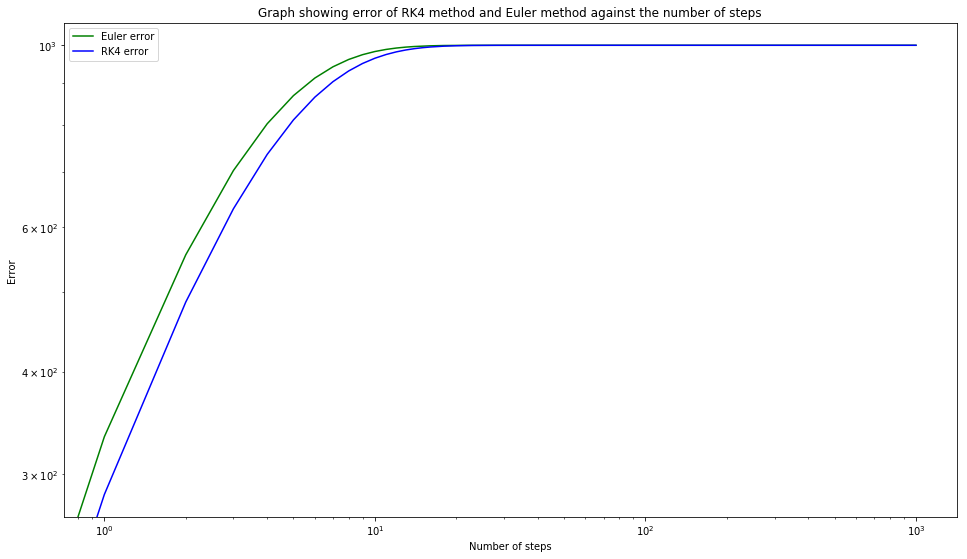

In [46]:
import pylab
import math
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,20))
ax = fig.add_subplot(2, 1, 1)
plt.title("Graph showing error of RK4 method and Euler method against the number of steps")
plt.xlabel("Number of steps")
plt.ylabel("Error")
ax.set_yscale('log')
ax.set_xscale('log')
Euler_error = plt.plot(numpy.arange(0,1001,1),(abs(analytic(1000,0)-solve_euler(f_rad,1000,0,10,1000))), label = 'Euler error', color = 'green')
RK4_error = plt.plot(numpy.arange(0,1001,1),(abs(analytic(1000,0)-solve_RK4(f_rad,1000,0,10,1000))), label = 'RK4 error', color = 'blue')
plt.legend()

ValueError: operands could not be broadcast together with shapes (10001,) (1001,) 

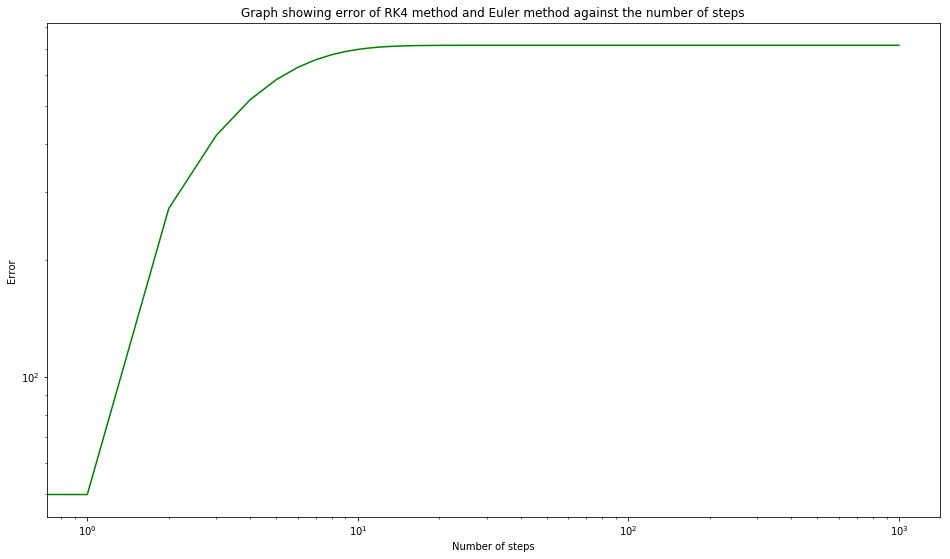

In [52]:
import pylab
import math
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,20))
ax = fig.add_subplot(2, 1, 1)
plt.title("Graph showing error of RK4 method and Euler method against the number of steps")
plt.xlabel("Number of steps")
plt.ylabel("Error")
ax.set_yscale('log')
ax.set_xscale('log')
Euler_error = plt.plot(numpy.arange(0,1001,1),(abs(analytic(1000,10)-solve_euler(f_rad,1000,10,10,1000))), label = 'Euler error', color = 'green')
RK4_error = plt.plot(numpy.arange(0,1001,1),(abs(analytic(1000,numpy.arange(0, 10001, 1))-solve_RK4(f_rad,1000,10,10,1000))), label = 'RK4 error', color = 'blue')
plt.legend()

In [47]:
print(abs(analytic(1000,6)-solve_euler(f_rad,1000,10,10,100)))

[181.22528161 152.0185552  374.21093724 522.35907738 621.13776288
 686.99906023 730.91248615 760.19203354 779.71435221 792.7309785
 801.40989431 807.19661491 811.05494654 813.62751293 815.34278743
 816.48645727 817.24900619 817.75744038 818.09644201 818.32247343
 818.47318128 818.57366666 818.64066591 818.68533808 818.71512352
 818.73498314 818.74822467 818.75705354 818.76294024 818.76686524
 818.76948225 818.77122717 818.7723906  818.77316632 818.77368354
 818.7740284  818.77425833 818.77441165 818.77451387 818.77458202
 818.77462747 818.77465777 818.77467797 818.77469144 818.77470042
 818.77470641 818.7747104  818.77471307 818.77471484 818.77471603
 818.77471681 818.77471734 818.77471769 818.77471793 818.77471808
 818.77471819 818.77471825 818.7747183  818.77471833 818.77471835
 818.77471837 818.77471837 818.77471838 818.77471838 818.77471839
 818.77471839 818.77471839 818.77471839 818.77471839 818.77471839
 818.77471839 818.77471839 818.77471839 818.77471839 818.77471839
 818.774718